## Guided Project: What type of free-apps are likely to attract more users on Google Play and the App Store?
In this project, we want to know what kind of apps in Google Play Store and App Store which has the greatest profit for the company. In order word, we will find apps that can attract more users. <br>
<br>
At first, we will read the available The Google Play Store data set which can be directly downloaded from [this link](https://dq-content.s3.amazonaws.com/350/googleplaystore.csv). For Apps Store, data set can be downloaded through [this link](https://dq-content.s3.amazonaws.com/350/AppleStore.csv)

In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/AXIOO/Downloads/AppleStore.csv")
df2 = pd.read_csv("C:/Users/AXIOO/Downloads/googleplaystore.csv")
#print(df2.head())
col_apple = ["id", "track_name", "size_bytes", "currency", "price", "rating_count_tot", "rating_count_ver", "user_rating",
          "user_rating_ver", "ver", "cont_rating", "prime_genre", "sup_devices", "ipadSc_urls", "lang", "vpp_lic"]
col_google = ["App", "Category", "Rating", "Reiews", "Size", "Installs", "Type", "Price", "Content_Rating", "Genres", 
             "Last Updated", "Current Ver", "Android Ver"]
#apple_file = open('AppleStore.csv')
#google_file = open('googleplaystore.csv')
#from csv import reader
#apple_reader = reader(apple_file)
#google_reader = reader(google_file)
apple = df.values.tolist()
google = df2.values.tolist()

#print(apple[:5])
#google = list(google_reader)

To see if the data well read, we will see at glance each data set respectively.

In [2]:
print(google[:2])
print('\n')
print(apple[:2])

[['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', 4.1, '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up'], ['Coloring book moana', 'ART_AND_DESIGN', 3.9, '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']]


[[284882215, 'Facebook', 389879808, 'USD', 0.0, 2974676, 212, 3.5, 3.5, '95.0', '4+', 'Social Networking', 37, 1, 29, 1], [389801252, 'Instagram', 113954816, 'USD', 0.0, 2161558, 1289, 4.5, 4.0, '10.23', '12+', 'Photo & Video', 37, 0, 29, 1]]


As we can see that there is a difference between these two data sets. For Google data set, we will often use data from the column Category, Rating, Reviews, Install, and Content Rating. Meanwhile, we will use data from column price, user_rating_ver, and prime_genre. <br>
<br>

We start with opening dan exploring these two data sets. Because this step is important for seeing the data, we will make a function named explore_data() that we can repeatedl use in the future. 

In [3]:
def explore_data(dataset, start, end, rows_and_cols=False):
    dataset_slice = dataset[start:end]
    for row in dataset_slice:
        print(row)
        print('\n')
    
    if rows_and_cols:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

The explore_data function need four parameters:
- dataset, in the form of list
- start, integer which represent starting indices from the data set
- end, integer which represent ending indices from the data set
- rows_and_cols=False

In [4]:
explore_data(apple, 0, 5)

[284882215, 'Facebook', 389879808, 'USD', 0.0, 2974676, 212, 3.5, 3.5, '95.0', '4+', 'Social Networking', 37, 1, 29, 1]


[389801252, 'Instagram', 113954816, 'USD', 0.0, 2161558, 1289, 4.5, 4.0, '10.23', '12+', 'Photo & Video', 37, 0, 29, 1]


[529479190, 'Clash of Clans', 116476928, 'USD', 0.0, 2130805, 579, 4.5, 4.5, '9.24.12', '9+', 'Games', 38, 5, 18, 1]


[420009108, 'Temple Run', 65921024, 'USD', 0.0, 1724546, 3842, 4.5, 4.0, '1.6.2', '9+', 'Games', 40, 5, 1, 1]


[284035177, 'Pandora - Music & Radio', 130242560, 'USD', 0.0, 1126879, 3594, 4.0, 4.5, '8.4.1', '12+', 'Music', 37, 4, 1, 1]




After that, process below is data cleaning. Before beginning our analysis, we have to see whether there are some inaccurate or duplicate data. This step is important to produce the best result of our analysis.
<br>
We can read through [this link](https://www.kaggle.com/lava18/google-play-store-apps/discussion) and conclude that there is an error for a certain row. 
<br>
This error is caused by the entry 10472 (without header). For solved this problem, we will delete the entire row of that entry. 

In [5]:
google[10473]

['osmino Wi-Fi: free WiFi',
 'TOOLS',
 4.2,
 '134203',
 '4.1M',
 '10,000,000+',
 'Free',
 '0',
 'Everyone',
 'Tools',
 'August 7, 2018',
 '6.06.14',
 '4.4 and up']

In [6]:
del google[10473]

In [7]:
google[10472]

['Life Made WI-Fi Touchscreen Photo Frame',
 '1.9',
 19.0,
 '3.0M',
 '1,000+',
 'Free',
 '0',
 'Everyone',
 nan,
 'February 11, 2018',
 '1.0.19',
 '4.0 and up',
 nan]

The next step is we will see if there is a duplicate data. For example, in google data set and for Instagram apps, there are more than one result if we called the data based on the name Instagram.  

In [8]:
for app in google:
    name = app[0]
    if name == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', 4.5, '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', 4.5, '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', 4.5, '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', 4.5, '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


For example, the main difference happens on the fourth position of each row, which corresponds to the number of reviews. The different numbers show the data was collected at different times. 

Code below describe the count of duplicate apps in Google Play Store and Apple Play Store. <br>
We begin with make a empty list for duplicate apss and unique apps. After that, we create a loop through the google data set. If there are the same apps, we append that apps into duplicate_apps list, else we append into unique_apps. 

In [9]:
duplicate_apps = []
unique_apps = []
for app in google:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
print('Number of duplicate apps in Google Play Store: ', len(duplicate_apps))
print('Number of unique apps in Google Play Store: ', len(unique_apps))


Number of duplicate apps in Google Play Store:  1180
Number of unique apps in Google Play Store:  9660


As we can see that there are 1180 duplicate apps in Google Play Store. We create the same procedure for Apple data set.

In [10]:
duplicate_apps2 = []
unique_apps2 = []
for app in apple:
    name = app[0]
    if name in unique_apps2:
        duplicate_apps2.append(name)
    else:
        unique_apps2.append(name)
print('Number of duplicate apps in Apple Play Store: ', len(duplicate_apps2))
print('Number of unique apps in Apple Play Store: ', len(unique_apps2))


Number of duplicate apps in Apple Play Store:  0
Number of unique apps in Apple Play Store:  7197


Because the difference is in the fourth column which represent the number of reviews, we can use this information to build a criterion for removing the duplicates. The higher the number of reviews, the more recent the data should be. Rather than removing duplicates randomly, we'll only keep the row with the highest number of reviews and remove the other entries for any given app.
<br>
Code below is process to find the apps that have a maximum number of reviews for the duplicate apps.

In [11]:
reviews_max = {}

for app in google:
    name = app[0]
    n_reviews = app[3]
    
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
        
    elif name not in reviews_max:
        reviews_max[name] = n_reviews       

print('Expected length:', len(google) - 1181)
print('Actual length:', len(reviews_max))
        

Expected length: 9659
Actual length: 9660


Because we already know that Apple data set doesn't have any duplicate data, we do not have to do the same thing as in Google data set. <br>
The process below explains about how we delete the duplicate rows in Google data set. We use the reviews_max dictionary which made before and we create two list, android_clean and already_added. <br>
If we find apps which has a maximum number of reviews for the duplicate apps and that apps not on the already_added list yet, we append the app to android_clean list. Do the iteration until all of apps in Google are checked.

In [12]:
android_clean = []
already_added = []

for app in google:
    name = app[0]
    n_reviews = app[3]
    if (n_reviews == reviews_max[name]) and (name not in already_added):
        android_clean.append(app)
        already_added.append(name)

        

In [13]:
explore_data(android_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', 4.1, '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', 4.7, '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', 4.5, '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9660
Number of columns: 13


The next step is we have to identify the non-english-speaking apps. For this analysis, we focus onnly on the apps that are directed toward an English-speaking audience. <br>
We will use ord() function and [ASCII](https://en.wikipedia.org/wiki/ASCII) system to identify the English text. The numbers corresponding to the characters we commonly use in an English text are all in the range 0 to 127. <br>
We construct cek_english function with a_string input. If every word has more than three characters (assumptions) with corresponding numbers falling outside the ASCII range, we conclude that the a_string labeled as non-English word.

In [14]:
def cek_english(a_string):
    non_ascii = 0
    for char in a_string:
        value = ord(char)
        if value > 127:
            non_ascii += 1
    if non_ascii>3:
        return False
    return True
    

In [15]:
cek_english('爱奇艺PPS -《欢乐颂2》电视剧热播')

False

The next step is we create a list for english-speaking apps in Google and Apple Store.

In [16]:
android_english = []
apple_english = []

for app in android_clean:
    name = app[0]
    if cek_english(name):
        android_english.append(app)

for app in apple:
    name = app[1]
    if cek_english(name):
        apple_english.append(app)
print(apple_english[:5])       

[[284882215, 'Facebook', 389879808, 'USD', 0.0, 2974676, 212, 3.5, 3.5, '95.0', '4+', 'Social Networking', 37, 1, 29, 1], [389801252, 'Instagram', 113954816, 'USD', 0.0, 2161558, 1289, 4.5, 4.0, '10.23', '12+', 'Photo & Video', 37, 0, 29, 1], [529479190, 'Clash of Clans', 116476928, 'USD', 0.0, 2130805, 579, 4.5, 4.5, '9.24.12', '9+', 'Games', 38, 5, 18, 1], [420009108, 'Temple Run', 65921024, 'USD', 0.0, 1724546, 3842, 4.5, 4.0, '1.6.2', '9+', 'Games', 40, 5, 1, 1], [284035177, 'Pandora - Music & Radio', 130242560, 'USD', 0.0, 1126879, 3594, 4.0, 4.5, '8.4.1', '12+', 'Music', 37, 4, 1, 1]]


In [17]:
explore_data(android_english, 0, 3, True)
print('\n')
explore_data(apple_english, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', 4.1, '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', 4.7, '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', 4.5, '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9615
Number of columns: 13


[284882215, 'Facebook', 389879808, 'USD', 0.0, 2974676, 212, 3.5, 3.5, '95.0', '4+', 'Social Networking', 37, 1, 29, 1]


[389801252, 'Instagram', 113954816, 'USD', 0.0, 2161558, 1289, 4.5, 4.0, '10.23', '12+', 'Photo & Video', 37, 0, 29, 1]


[529479190, 'Clash of Clans', 116476928, 'USD', 0.0, 2130805, 579, 4.5, 4.5, '9.24.12', '9+', 'Games', 38, 5, 18, 1]


Number of rows: 6183
Number of columns:

Because ouf focus only on free apps, we have to separate the paid and free applications in both market. For Google Play Store, we can see at the seventh column to check if it belongs to free or paid apps. In the other hand for Apple Store, we can see at the price column. 

In [18]:
google_free = []
apple_free = []

for app in android_english:
    value = app[6]
    if value == 'Free':
        google_free.append(app)
    
for app in apple_english:
    value = app[4]
    if value == 0:
        apple_free.append(app)
        
print(len(google_free))
print(len(apple_free))

print(apple_free[:5])

8861
3222
[[284882215, 'Facebook', 389879808, 'USD', 0.0, 2974676, 212, 3.5, 3.5, '95.0', '4+', 'Social Networking', 37, 1, 29, 1], [389801252, 'Instagram', 113954816, 'USD', 0.0, 2161558, 1289, 4.5, 4.0, '10.23', '12+', 'Photo & Video', 37, 0, 29, 1], [529479190, 'Clash of Clans', 116476928, 'USD', 0.0, 2130805, 579, 4.5, 4.5, '9.24.12', '9+', 'Games', 38, 5, 18, 1], [420009108, 'Temple Run', 65921024, 'USD', 0.0, 1724546, 3842, 4.5, 4.0, '1.6.2', '9+', 'Games', 40, 5, 1, 1], [284035177, 'Pandora - Music & Radio', 130242560, 'USD', 0.0, 1126879, 3594, 4.0, 4.5, '8.4.1', '12+', 'Music', 37, 4, 1, 1]]


So far in the data cleaning process, we:
- Removed inaccurate data
- Removed duplicate app entries
- Removed non-English apps
<br>
<br>
Because our aim is to find apps that are likely to attract more users, we need to determine app profile that are successful on both Google Play and The App Store. <br>
We begin the analysis by determine the most common genres for each market. We will build frequency tables for a few columns in our data sets.<br>

First, we create freq_table with two parameters: dataset and index. We initiate with empty list table and empty dictionary table_percentages which expressed as percentages for any column we want to calculate.

In [19]:
def freq_table(dataset, index):
    table = {}
    
    for app in dataset:
        value = app[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
    
    table_percentages = {}
    for key in table:
        table_percentages[key] = (table[key] / len(dataset)) * 100
    
    return table_percentages

freq_table(apple_free, 11)

{'Social Networking': 3.2898820608317814,
 'Photo & Video': 4.9658597144630665,
 'Games': 58.16263190564867,
 'Music': 2.0484171322160147,
 'Reference': 0.5586592178770949,
 'Health & Fitness': 2.0173805090006205,
 'Weather': 0.8690254500310366,
 'Utilities': 2.5139664804469275,
 'Travel': 1.2414649286157666,
 'Shopping': 2.60707635009311,
 'News': 1.3345747982619491,
 'Navigation': 0.186219739292365,
 'Lifestyle': 1.5828677839851024,
 'Entertainment': 7.883302296710118,
 'Food & Drink': 0.8069522036002483,
 'Sports': 2.1415270018621975,
 'Book': 0.4345127250155183,
 'Finance': 1.1173184357541899,
 'Education': 3.662321539416512,
 'Productivity': 1.7380509000620732,
 'Business': 0.5276225946617008,
 'Catalogs': 0.12414649286157665,
 'Medical': 0.186219739292365}

Before we analyze, we have to sort the frequency table for the prime_genre column of the App Store data set above.

In [20]:
import operator
d = freq_table(apple_free, 11)
sorted_d = sorted(d.items(), key=operator.itemgetter(1))
sorted_d



[('Catalogs', 0.12414649286157665),
 ('Navigation', 0.186219739292365),
 ('Medical', 0.186219739292365),
 ('Book', 0.4345127250155183),
 ('Business', 0.5276225946617008),
 ('Reference', 0.5586592178770949),
 ('Food & Drink', 0.8069522036002483),
 ('Weather', 0.8690254500310366),
 ('Finance', 1.1173184357541899),
 ('Travel', 1.2414649286157666),
 ('News', 1.3345747982619491),
 ('Lifestyle', 1.5828677839851024),
 ('Productivity', 1.7380509000620732),
 ('Health & Fitness', 2.0173805090006205),
 ('Music', 2.0484171322160147),
 ('Sports', 2.1415270018621975),
 ('Utilities', 2.5139664804469275),
 ('Shopping', 2.60707635009311),
 ('Social Networking', 3.2898820608317814),
 ('Education', 3.662321539416512),
 ('Photo & Video', 4.9658597144630665),
 ('Entertainment', 7.883302296710118),
 ('Games', 58.16263190564867)]

In [21]:
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
    #print(table_display)
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])
display_table(apple_free, 11)

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


As we can see that the App Store is dominated by Games category. The second position ia entertainment category which about 7.8%. Next are Photo&Video, Education, and Social neworking. We have to know why Games category has the most users among the other category. 

In [22]:
import pandas as pd

df_apple = pd.DataFrame(apple_free) 
df_apple.columns = col_apple

df_google = pd.DataFrame(google_free) 
df_google.columns = col_google

df_google["Installs"] = df_google["Installs"].str.replace('+', '')
df_google["Installs"] = df_google["Installs"].str.replace(',', '')
df_google["Installs"] = df_google["Installs"].astype(float)

df_google.dtypes
#df_google.iloc[0,5]+df_google.iloc[1,5]

#df_google.head(5)


App                object
Category           object
Rating            float64
Reiews             object
Size               object
Installs          float64
Type               object
Price              object
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

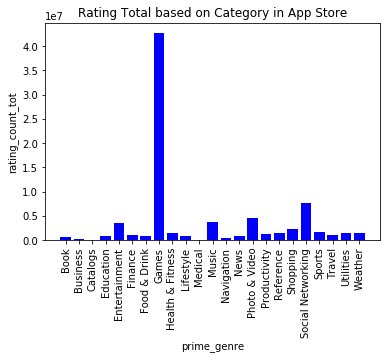

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_apple_test = df_apple[["prime_genre", "rating_count_tot"]]
df_apple_groupby = df_apple_test.groupby(["prime_genre"], as_index = False).sum()
#df_groupby_pivot = df_groupby.pivot(index = "prime_genre", columns = "rating_count_tot")
#df_groupby_pivot

plt.bar("prime_genre", "rating_count_tot", data = df_apple_groupby, color = "blue")
plt.xlabel("prime_genre")
plt.xticks(rotation = 90)
plt.ylabel("rating_count_tot")
plt.title("Rating Total based on Category in App Store")
plt.show()
#pyplot.bar(df["prime_genre"], df_groupby)

Based on ba chart above, we can see rating in App Store is highly dominated by Games applications. For the detail, we will create rating chart especially in Games category.

average rating games:  22788.6696905016


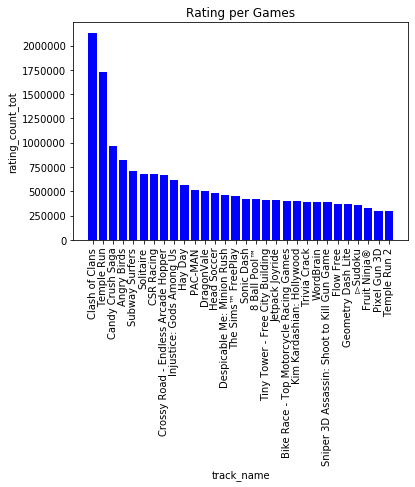

In [24]:
games_bool = df_apple["prime_genre"] == "Games"
df_games = df_apple[games_bool]
#df_games.head(5)
df_games_sort = df_games.sort_values(by='rating_count_tot', ascending=False)
#df_games_sort.head()
avg_rating_games = df_games["rating_count_tot"].mean()
print("average rating games: ", avg_rating_games)
plt.bar("track_name", "rating_count_tot", data = df_games_sort.head(30), color = "blue")
plt.xlabel("track_name")
plt.xticks(rotation = 90)
plt.ylabel("rating_count_tot")
plt.title("Rating per Games")
plt.show()

Clash of Clans is the most favourite games in App Store with rating is 2,000,000 while the rating average is about 22,788. We can conclude that most user in App Store are likely to use applications whose belong to fun category such as games.  

Now we turn to analyze what kind of applications that has the highest rating in Google Play Store. In this analysis, we will use Install column to represent the most preferred applications by Google users. We have to convert Install column to float. After that, we build frequency table by category with average value. 

In [25]:
genre_google = freq_table(google_free, 1)
#print(genre_google)
freq_google = {}
for category in genre_google:
    total = 0
    len_category = 0
    for app in google_free:
        category_app = app[1]
        if category_app == category:
            value = app[5]
            value = value.replace('+', '')
            value = value.replace(',', '')
            value = float(value)
            total += value
            len_category += 1
    avg_install = total/len_category
    #print(category, ': ', avg_install)
    freq_google[category] = avg_install
freq_google

{'ART_AND_DESIGN': 1986335.0877192982,
 'AUTO_AND_VEHICLES': 647317.8170731707,
 'BEAUTY': 513151.88679245283,
 'BOOKS_AND_REFERENCE': 8767811.894736841,
 'BUSINESS': 1712290.1474201474,
 'COMICS': 817657.2727272727,
 'COMMUNICATION': 38456119.167247385,
 'DATING': 854028.8303030303,
 'EDUCATION': 1820673.076923077,
 'ENTERTAINMENT': 11640705.88235294,
 'EVENTS': 253542.22222222222,
 'FINANCE': 1387692.475609756,
 'FOOD_AND_DRINK': 1924897.7363636363,
 'HEALTH_AND_FITNESS': 4188821.9853479853,
 'HOUSE_AND_HOME': 1331540.5616438356,
 'LIBRARIES_AND_DEMO': 638503.734939759,
 'LIFESTYLE': 1437816.2687861272,
 'GAME': 15560965.599534342,
 'FAMILY': 3696479.242695289,
 'MEDICAL': 120616.48717948717,
 'SOCIAL': 23253652.127118643,
 'SHOPPING': 7036877.311557789,
 'PHOTOGRAPHY': 17805627.643678162,
 'SPORTS': 3638640.1428571427,
 'TRAVEL_AND_LOCAL': 13984077.710144928,
 'TOOLS': 10682301.033377837,
 'PERSONALIZATION': 5201482.6122448975,
 'PRODUCTIVITY': 16787331.344927534,
 'PARENTING': 5426

In [26]:
genre_ios = freq_table(apple_free, 11)
for genre in genre_ios:
    total = 0
    len_genre = 0
    for app in apple_free:
        genre_app = app[11]
        if genre_app == genre:
            value = float(app[5])
            total += value
            len_genre += 1
    avg_ratings = total/len_genre
    print(genre, ': ', avg_ratings)

Social Networking :  71548.34905660378
Photo & Video :  28441.54375
Games :  22788.6696905016
Music :  57326.530303030304
Reference :  74942.11111111111
Health & Fitness :  23298.015384615384
Weather :  52279.892857142855
Utilities :  18684.456790123455
Travel :  28243.8
Shopping :  26919.690476190477
News :  21248.023255813954
Navigation :  86090.33333333333
Lifestyle :  16485.764705882353
Entertainment :  14029.830708661417
Food & Drink :  33333.92307692308
Sports :  23008.898550724636
Book :  39758.5
Finance :  31467.944444444445
Education :  7003.983050847458
Productivity :  21028.410714285714
Business :  7491.117647058823
Catalogs :  4004.0
Medical :  612.0


We will use data frame to build a chart

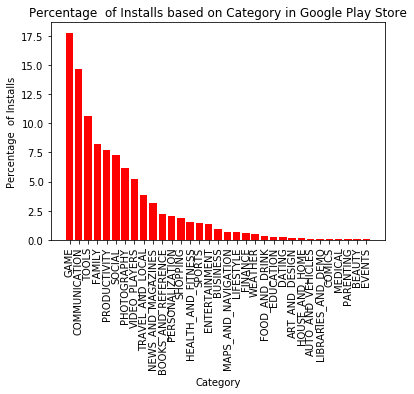

In [27]:
df_google_test = df_google[["Category", "Installs"]]
df_google_groupby = df_google_test.groupby(["Category"], as_index = False).sum()
df_google_sort = df_google_groupby.sort_values(by='Installs', ascending=False)
df_google_sort["Percentage"] = df_google_sort["Installs"]*100/df_google_sort["Installs"].sum()
#df_google_sort
plt.bar("Category", "Percentage", data = df_google_sort, color = "red")
plt.xlabel("Category")
plt.xticks(rotation = 90)
plt.ylabel("Percentage  of Installs")
plt.title("Percentage  of Installs based on Category in Google Play Store")
plt.show()

Sekarang analisa frekuensi rating untuk Google Play Store <br>
group by genre di game    

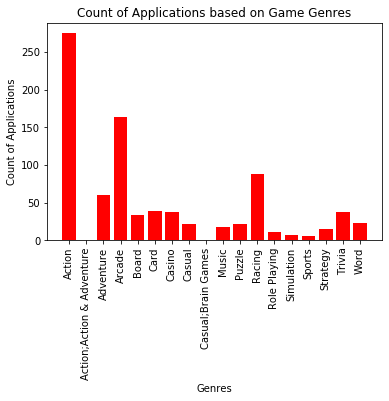

In [40]:
df_google_test1 = df_google[["Category", "Genres"]]
game_bool2 = df_google_test1["Category"] == "GAME"
df_game = df_google_test1[game_bool2]
df_game_groupby = df_game.groupby(["Genres"], as_index = False).count()
df_game_groupby.rename(columns={"Category":"Count"}, inplace = True)
plt.bar("Genres", "Count", data = df_game_groupby, color = "red")
plt.xlabel("Genres")
plt.xticks(rotation = 90)
plt.ylabel("Count of Applications")
plt.title("Count of Applications based on Game Genres")
plt.show()

Based on chart above, we can see that Action genre has the most users in Game category on Google Play Store. 

In [37]:
genre_google = freq_table(google_free, 1)
#print(genre_google)
freq_google = {}
for category in genre_google:
    total = 0
    len_category = 0
    for app in google_free:
        category_app = app[1]
        if category_app == category:
            value = app[5]
            value = value.replace('+', '')
            value = value.replace(',', '')
            value = float(value)
            total += value
            len_category += 1
    avg_install = total/len_category
    #print(category, ': ', avg_install)
    freq_google[category] = avg_install
freq_google

{'ART_AND_DESIGN': 1986335.0877192982,
 'AUTO_AND_VEHICLES': 647317.8170731707,
 'BEAUTY': 513151.88679245283,
 'BOOKS_AND_REFERENCE': 8767811.894736841,
 'BUSINESS': 1712290.1474201474,
 'COMICS': 817657.2727272727,
 'COMMUNICATION': 38456119.167247385,
 'DATING': 854028.8303030303,
 'EDUCATION': 1820673.076923077,
 'ENTERTAINMENT': 11640705.88235294,
 'EVENTS': 253542.22222222222,
 'FINANCE': 1387692.475609756,
 'FOOD_AND_DRINK': 1924897.7363636363,
 'HEALTH_AND_FITNESS': 4188821.9853479853,
 'HOUSE_AND_HOME': 1331540.5616438356,
 'LIBRARIES_AND_DEMO': 638503.734939759,
 'LIFESTYLE': 1437816.2687861272,
 'GAME': 15560965.599534342,
 'FAMILY': 3696479.242695289,
 'MEDICAL': 120616.48717948717,
 'SOCIAL': 23253652.127118643,
 'SHOPPING': 7036877.311557789,
 'PHOTOGRAPHY': 17805627.643678162,
 'SPORTS': 3638640.1428571427,
 'TRAVEL_AND_LOCAL': 13984077.710144928,
 'TOOLS': 10682301.033377837,
 'PERSONALIZATION': 5201482.6122448975,
 'PRODUCTIVITY': 16787331.344927534,
 'PARENTING': 5426